# HOTEL REVIEWS NLP
## Group E n

In [1]:
import pandas as pd

serie = pd.read_csv('Hotel reviews.csv')
df = pd.DataFrame(serie)

In [2]:
# Keeping only the hotels for our business purpose
df = df[df['Establishment Type'] == 'Hotel']
del df['Establishment Type']
df.head()

,Review Date,Star Rating,Overview,Review,Traveler Type,Score Breakdown,Location,Reviewer Rank,Name,Price Range,Hotel ID
0,28-Feb-11,5,Very nice atmosphere,We were together with some friends at the Anew...,traveled with family,Value: 5 of 5 stars; Location: 5 of 5 stars; S...,"Skofja Loka, Slovenia",NaN,Villa Ottone,$$,25.0
1,21-Feb-10,4,"Very nice food, great atmosphere, feels like...",Martin and his staff are truely great! They ma...,traveled with family,Value: 5 of 5 stars; Location: 3 of 5 stars; S...,Brussels,Contributor,Villa Ottone,$$,25.0
2,4 days ago NEW,5,Best Hotel on the Planet,We have stayed at the Excelsior on numerous oc...,traveled with family,Value: 5 of 5 stars; Sleep Quality: 5 of 5 sta...,"Singapore, Singapore",Contributor,San Vigilio,$$$$,49.0
3,17-Sep-14,5,Fantastic,The great reviews are well deserved. Stayed he...,traveled as a couple,Location: 5 of 5 stars; Rooms: 5 of 5 stars; S...,"Burlington, Canada",Senior Contributor,San Vigilio,$$$$,49.0
4,27-Jul-14,5,It is all true!,Not sure we can add anything to the accurate r...,traveled as a couple,Rooms: 5 of 5 stars; Cleanliness: 5 of 5 stars...,"Manchester, United Kingdom",Senior Reviewer,San Vigilio,$$$$,49.0


#### Date Cleaning

In [3]:
df = df[~df['Review Date'].str.contains("ago")]
df = df[~df['Review Date'].str.contains("NEW")]
df = df.reset_index(drop = True)
df['Review Date'] = pd.to_datetime(df['Review Date'])

In [4]:
#Checking types of columns
df.dtypes

Review Date        datetime64[ns]
Star Rating                 int64
Overview                   object
Review                     object
Traveler Type              object
Score Breakdown            object
Location                   object
Reviewer Rank              object
Name                       object
Price Range                object
Hotel ID                  float64
dtype: object

#### Location Cleaning

In [5]:
#Assigning a NULL to the empty cell, without doing it it is difficult to work on this column of lists
df.Location[df.Location.isnull() == True] = 'NULL' 
df.Location = df.Location.str.split(", ")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# Creating a column just with the city and not the country because we have a lot of missing values for the country so is relevant to save only the city
for i in range(0,len(df)):
        df.Location[i] = df.Location[i][0]
        

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Reviewer Rank Cleaning

In [7]:
#Normalizing Review Rank but replacing NAs with Contributor 
df['Reviewer Rank'].fillna('Contributor', inplace=True)
df['Reviewer Rank'] = df['Reviewer Rank'].map({'Contributor': 1,'Reviewer': 2,\
                                               'Senior Contributor': 3,'Senior Reviewer': 4, 'Top Contributor': 5}).astype(int)

#### Expanding the Score Breakdown into 6 different columns: 
* `Value` 
* `Location` 
* `Sleep Quality`
* `Rooms` 
* `Cleanliness` 
* `Service` 

In [8]:
## creating a function to use in the below for loop
def sorter(text):
    text = text.strip()
    if text == "Value":
        return 0
    elif text == "Location":
        return 1
    elif text == "Sleep Quality":
        return 2
    elif text == "Rooms":
        return 3
    elif text == "Cleanliness":
        return 4
    elif text == "Service":
        return 5
    else:
        return 6
    

In [9]:
#Dropping NAs for the Score Breakdown column in order to continue with the filtering
df = df[df['Score Breakdown'].notna()].reset_index(drop = True)

#Creating an array for each value using the function mentioned above
import numpy as np
ma = np.zeros(shape = (len(df['Score Breakdown']), 7))

for i in range(0,len(df['Score Breakdown'])):
    
    ar = df['Score Breakdown'][i].split(";")
    ln = np.zeros(7)
    for j in range(0,len(ar)):
        k = ar[j][0:ar[j].index(':')]
        value = ar[j][(ar[j].index(':')+1):(ar[j].index('of'))].strip()
        ln[sorter(k)] = value
    ma[i] = ln
            

In [10]:
# converting the arrays created into columns by using the transpose function and deleting the Score Breakdown
df['Value'] = pd.Series(np.transpose(ma)[0]).astype(int)
df['Location'] = pd.Series(np.transpose(ma)[1]).astype(int)
df['Sleep Quality'] = pd.Series(np.transpose(ma)[2]).astype(int)
df['Rooms'] = pd.Series(np.transpose(ma)[3]).astype(int)
df['Cleanliness'] = pd.Series(np.transpose(ma)[4]).astype(int)
df['Service'] = pd.Series(np.transpose(ma)[5]).astype(int)
del df['Score Breakdown']

In [11]:
#Checking for NAs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4059 entries, 0 to 4058
Data columns (total 15 columns):
Review Date      4059 non-null datetime64[ns]
Star Rating      4059 non-null int64
Overview         4059 non-null object
Review           4059 non-null object
Traveler Type    3771 non-null object
Location         4059 non-null int64
Reviewer Rank    4059 non-null int64
Name             4059 non-null object
Price Range      3761 non-null object
Hotel ID         4019 non-null float64
Value            4059 non-null int64
Sleep Quality    4059 non-null int64
Rooms            4059 non-null int64
Cleanliness      4059 non-null int64
Service          4059 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(5)
memory usage: 475.8+ KB


#### Traveler Type Cleaning

In [12]:
u = df['Traveler Type'].str.partition()
df['Traveler Type'] = pd.DataFrame({ 'Traveler Type': u[2].str.split().str[-1]})
df['Traveler Type'].unique()

array(['family', 'couple', 'friends', 'solo', 'business', nan],
      dtype=object)

In [13]:
#Normalizing the Traveler Type
df['Traveler Type'] = df['Traveler Type'].map({'solo': 1,'couple': 2,\
                                               'friends': 3,'family': 4, 'business': 5})

In [14]:
# Filling NAs randomly of Traveller Type since we do not want to remove more rows
fill_list = [1,2,3,4,5]
df['Traveler Type'] = df['Traveler Type'].fillna(pd.Series(np.random.choice(fill_list, size=len(df.index))))
df['Traveler Type'] = df['Traveler Type'].astype(int)

#### Price Range Cleaning

In [15]:
#Normalizing Price Range
df['Price Range'] = df['Price Range'].map({'$': 1,'$$': 2,\
                                               '$$$': 3,'$$$$': 4})
#Filling missing Values using the mean
df['Price Range']=df['Price Range'].fillna(df['Price Range'].mean())


#### Hotel ID Cleaning

In [16]:
#since we have 40 missing values in this column and the values are unique, we will drop the NAs
df = df[df['Hotel ID'].notna()].reset_index(drop = True)
#converting Hotel ID to int
df['Hotel ID'] = df['Hotel ID'].astype(int)

## EDA

In [17]:
#Grouping by Name(City) to get the top Hotels
HotelCountPerCity = df.groupby(['Name']).agg({'Hotel ID':['count']})
HotelCountPerCity.columns = ['Number of Hotels']
print("Top 5 cities with most Hotels:")
HotelCountPerCity.sort_values(by="Number of Hotels", ascending=False).head()

Top 5 cities with most Hotels:


,Number of Hotels
Name,
Bolzano,803
Castelrotto,393
Ortisei,375
Corvara in Badia,297
Sesto,161


#### Creating a new dataframe called MeanAndCount to analyze the different types of ratings. It contains:
* `Count` 
* `Value_mean` 
* `Location_mean` 
* `Sleep Quality_mean`
* `Rooms_mean` 
* `Cleanliness_mean` 
* `Service_mean` 

In [18]:
#Grouping by Hotel ID 
MeanAndCount = df.groupby(['Hotel ID']).agg({'Hotel ID':['count'],'Value': ['mean'],'Location': ['mean'], 'Sleep Quality': ['mean'], 'Rooms': ['mean'],\
                              'Cleanliness': ['mean'],'Service': ['mean']})
MeanAndCount.columns = ['Count','Value_mean','Location_mean', 'SleepQuality_mean', 'Rooms_mean','Cleanliness_mean','Service_mean']                
MeanAndCount = MeanAndCount.reset_index()



In [19]:
# getting the Hotels with most reviews
print("Top 5 Hotels with most counts:")
top = MeanAndCount.sort_values(by="Count", ascending=False).head()
top

Top 5 Hotels with most counts:


,Hotel ID,Count,Value_mean,Location_mean,SleepQuality_mean,Rooms_mean,Cleanliness_mean,Service_mean
47,50,240,4.112500,4.091667,3.712500,3.987500,4.508333,4.708333
15,18,185,4.432432,4.372973,3.210811,4.264865,4.675676,4.800000
72,100,184,4.021739,4.478261,3.494565,4.347826,4.445652,4.478261
9,12,183,4.502732,4.180328,3.710383,4.021858,4.491803,4.765027
27,30,167,4.011976,4.011976,3.479042,3.952096,4.347305,4.646707


In [20]:

top.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar",legend=None, title = "Top 5 hotels with most counts")

In [21]:
# getting the Hotels with highest ratings keeping number of reviews > 10 
print("Top 5 Hotels with highest Value ratings:")
MeanAndCount = MeanAndCount[MeanAndCount['Count'] >10]
top_value = MeanAndCount.sort_values(by="Value_mean", ascending=False).head()
top_value

Top 5 Hotels with highest Value ratings:


,Hotel ID,Count,Value_mean,Location_mean,SleepQuality_mean,Rooms_mean,Cleanliness_mean,Service_mean
14,17,24,4.666667,3.958333,3.000000,3.500000,4.291667,4.791667
9,12,183,4.502732,4.180328,3.710383,4.021858,4.491803,4.765027
18,21,50,4.480000,3.940000,3.140000,3.880000,4.440000,4.660000
2,4,17,4.470588,4.235294,3.000000,3.411765,4.235294,4.588235
49,52,15,4.466667,3.533333,3.066667,3.466667,4.733333,4.333333


#### Plotting top 5 hotels with highest mean of the six different categories

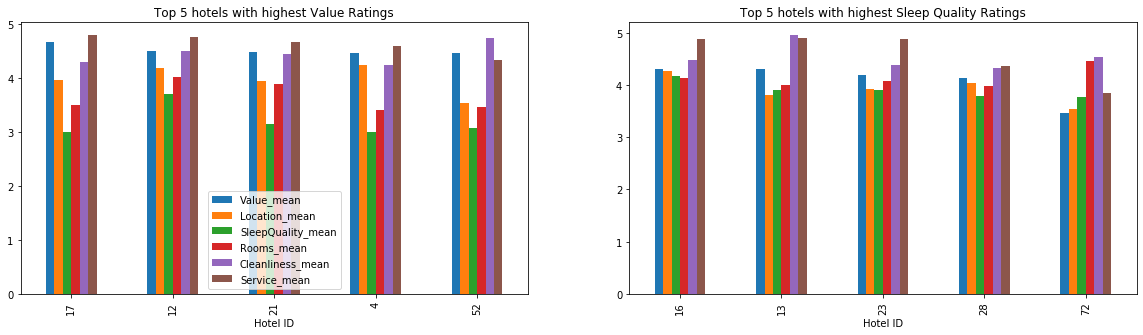

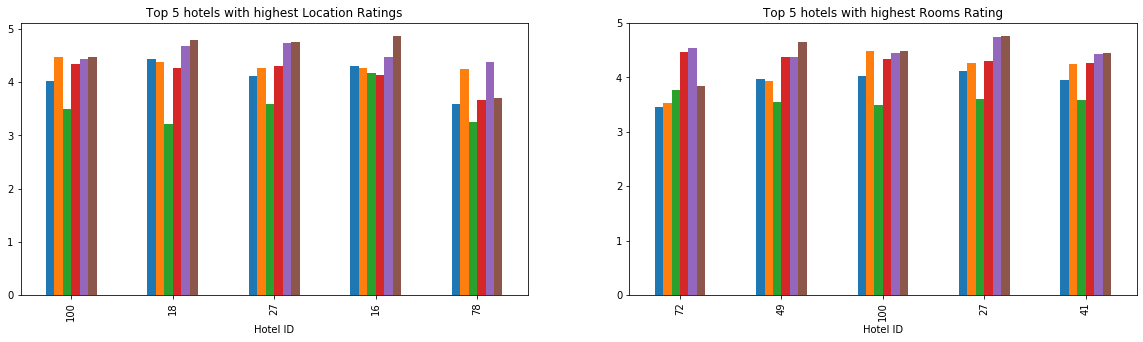

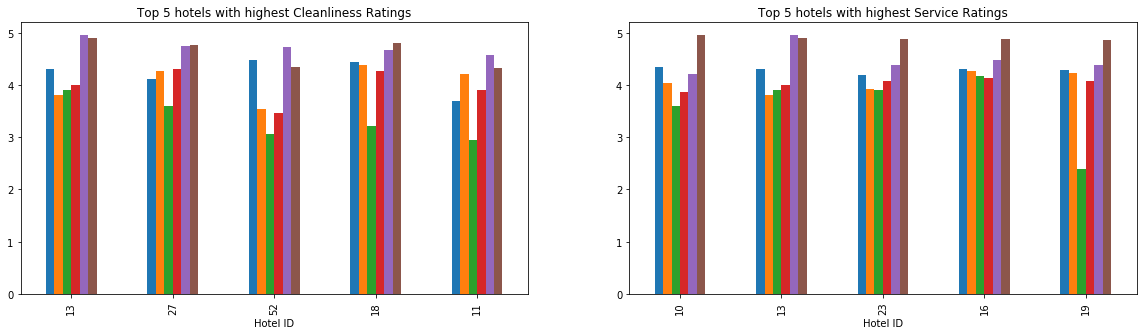

In [22]:
# Increasing size of output window
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 65em; }</style>"))

# keeping number of reviews > 10
MeanAndCount = MeanAndCount[MeanAndCount['Count'] >10]

top_value = MeanAndCount.sort_values(by="Value_mean", ascending=False).head()
top_sleepquality = MeanAndCount.sort_values(by="SleepQuality_mean", ascending=False).head()
top_location = MeanAndCount.sort_values(by="Location_mean", ascending=False).head()
top_rooms = MeanAndCount.sort_values(by="Rooms_mean", ascending=False).head()
top_cleanliness = MeanAndCount.sort_values(by="Cleanliness_mean", ascending=False).head()
top_service = MeanAndCount.sort_values(by="Service_mean", ascending=False).head()


from matplotlib import pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))

top_value.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar", ax=ax1, title = "Top 5 hotels with highest Value Ratings")

top_sleepquality.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar",legend=None, ax=ax2, title = "Top 5 hotels with highest Sleep Quality Ratings")

fig, (ax3,ax4) = plt.subplots(1,2, figsize=(20,5))

top_location.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar",legend=None, ax=ax3, title = "Top 5 hotels with highest Location Ratings")

top_rooms.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar",legend=None, ax=ax4, title = "Top 5 hotels with highest Rooms Rating")

fig, (ax5,ax6) = plt.subplots(1,2, figsize=(20,5))

top_cleanliness.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar",legend=None, ax=ax5, title = "Top 5 hotels with highest Cleanliness Ratings")
               
top_service.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar",legend=None, ax=ax6, title = "Top 5 hotels with highest Service Ratings")


Looking at the graphs above and the Minimum and Maximum ratings below, we notice that Sleep Quality has always low ratings reaching a minimum of 1.5833 (not shown in the graphs). Hotel ID 16 has the highest Sleep Quality with a 4.17 compared to Hotel ID 17 with a 4.66 in Value ratings. Moreover, we can see that Cleanliness and Service have the two highest ratings in most graphs which that we will not have a lot of negative ratings that mention these two categories, they have a maximum rating of around 4.95 for both. However, this means that after doing the analysis, we should have a lot of negative comments that mention Sleep Quality, Rooms, Value.

In [23]:
# Get a series containing maximum value of each rating column
MeanAndCount1 = MeanAndCount
del MeanAndCount1['Hotel ID']
del MeanAndCount1['Count']
maxRatings = MeanAndCount1.max()
 
print('Maximum average of each rating category : ')
print(maxRatings)

Maximum average of each rating category : 
Value_mean           4.666667
Location_mean        4.478261
SleepQuality_mean    4.173913
Rooms_mean           4.461538
Cleanliness_mean     4.950000
Service_mean         4.944954
dtype: float64


In [24]:
# Get a series containing minimum value of each rating column

minRatings = MeanAndCount1.min()
 
print('Minimum average of each rating category: ')
print(minRatings)

Minimum average of each rating category: 
Value_mean           3.301887
Location_mean        2.400000
SleepQuality_mean    1.583333
Rooms_mean           2.933333
Cleanliness_mean     3.650000
Service_mean         3.700000
dtype: float64


#### Plotting a time series of Year vs. Count

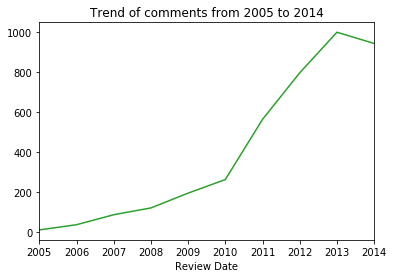

In [25]:
df['Review Date'].groupby([df['Review Date'].dt.year]).agg('count').plot(color = 'C2', kind="line", title = "Trend of comments from 2005 to 2014")


The trend shows an upward trend from 11 comments in 2005 reaching 1000 comments in 2013, an increase of  around 9000% in 8 years. This implies that nowadays we have millions of comments happening each day which means that an analyst working in the hotel management cannot track the comments except if it is automated in splitting comments into good or bad and giving advice to improve the work. This work is done using NLP and ML as shown further in this analysis

#### How are ratings Distributed

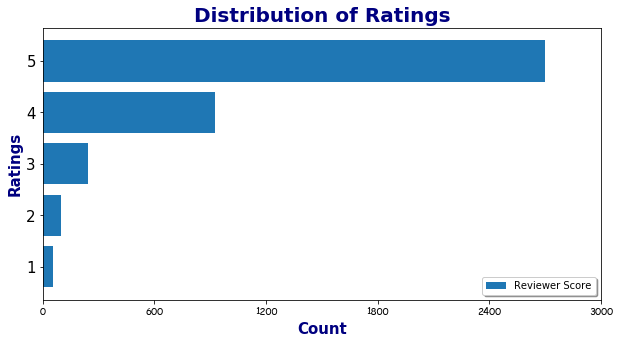

In [26]:

# Plot ratings frequency
plt.figure(figsize = [10,5])   # [width, height]

x = list( df['Star Rating'].value_counts().index )
y = list( df['Star Rating'].value_counts() )
plt.barh(x, y)

ticks_x = np.linspace(0, 3000, 6)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks( size=15 )

plt.title('Distribution of Ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['Reviewer Score'], shadow=True, loc=4)